In [ ]:
#➡️ Data Analysis and Visualization Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
path = "C:/Users/ancir/OneDrive/Desktop/premier league"

print(os.listdir(path)) #➡️ List all files in the specified directory

dfs =[]
for file in os.listdir(path):
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)#➡️ Join the folder path + file name → this gives the full path to the file
        df_temp= pd.read_csv(file_path) #➡️ Read the csv file into a temporary dataframe
        team_name = os.path.splitext(file)[0] #➡️ Extract the team name from the file name (remove .csv)
        df_temp['Team'] = team_name #➡️ Add a new column 'Team' with the team name
        dfs.append(df_temp) #➡️ Append the temporary dataframe to the list
final_df = pd.concat(dfs, ignore_index=True) #➡️ Concatenate all dataframes in the list into a single dataframe
final_df.head() #➡️ Display the first few rows of the final dataframe

['Arsenal.csv', 'Chelsea.csv', 'Liverpool.csv', 'Manchester City.csv', 'Manchester United.csv', 'Tottenham.csv']


,Date,Opponent,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,...,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate,Team
0,2013-08-04 18:20:00,Galatasaray,1,-1,1,2,55,12,5,425,...,3,15,2,0.416667,2013,8,7,1.000000,0.00,Arsenal
1,2013-08-17 17:00:00,Aston Villa,1,-1,1,3,64,15,4,457,...,2,19,1,0.266667,2013,8,6,1.000000,0.00,Arsenal
2,2013-08-21 21:45:00,Fenerbahçe,0,1,3,0,60,13,7,451,...,2,15,1,0.538462,2013,8,3,1.666667,0.33,Arsenal
3,2013-08-24 14:45:00,Fulham,0,1,3,1,54,19,9,496,...,1,10,3,0.473684,2013,8,6,2.000000,0.50,Arsenal
4,2013-08-27 21:45:00,Fenerbahçe,1,1,2,0,65,14,6,460,...,4,16,1,0.428571,2013,8,2,2.000000,0.60,Arsenal


In [5]:
final_df.info() #➡️ Get a summary of the dataframe including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4194 non-null   object 
 1   Opponent                   4194 non-null   object 
 2   Is_Home                    4194 non-null   int64  
 3   Result                     4194 non-null   int64  
 4   Goals                      4194 non-null   int64  
 5   Opponent_Goals             4194 non-null   int64  
 6   Possession                 4194 non-null   int64  
 7   Shots                      4194 non-null   int64  
 8   Shots_On_Target            4194 non-null   int64  
 9   Passes_Completed           4194 non-null   int64  
 10  Pass_Accuracy              4194 non-null   int64  
 11  Corners                    4194 non-null   int64  
 12  Crosses                    4194 non-null   int64  
 13  Fouls                      4194 non-null   int64

In [6]:
final_df.isnull().sum() #➡️ Check for missing values in each column

Date                         0
Opponent                     0
Is_Home                      0
Result                       0
Goals                        0
Opponent_Goals               0
Possession                   0
Shots                        0
Shots_On_Target              0
Passes_Completed             0
Pass_Accuracy                0
Corners                      0
Crosses                      0
Fouls                        0
Offsides                     0
Opponent_Possession          0
Opponent_Shots               0
Opponent_Shots_On_Target     0
Opponent_Passes_Completed    0
Opponent_Pass_Accuracy       0
Opponent_Corners             0
Opponent_Crosses             0
Opponent_Fouls               0
Opponent_Offsides            0
Shot_Efficiency              1
Season                       0
Month                        0
Day_of_Week                  0
Last5_Avg_Goals              0
Last5_Win_Rate               0
Team                         0
dtype: int64

In [7]:
mean_value = final_df['Shot_Efficiency'].mean() #➡️ Calculate the mean of the 'Shot_Efficiency' column
final_df['Shot_Efficiency']=final_df['Shot_Efficiency'].fillna(mean_value) #➡️ Fill missing values with the mean
final_df_shoeff = final_df['Shot_Efficiency']

In [8]:
print(final_df_shoeff.isnull().sum()) #➡️ Verify that there are no missing values left in the 'Shot_Efficiency' column

0


In [9]:
df_reduce = final_df.drop(['Date', 'Opponent', 'Result', 'Opponent_Possession', 'Opponent_Goals', 'Opponent_Shots',
               'Opponent_Shots_On_Target', 'Opponent_Passes_Completed', 'Opponent_Pass_Accuracy',
               'Opponent_Corners', 'Opponent_Crosses', 'Opponent_Fouls', 'Opponent_Offsides',
               'Season', 'Month', 'Day_of_Week'], axis=1)#➡️ Drop unnecessary columns to simplify the dataframe
df_reduce.head() #➡️ Display the first few rows of the cleaned dataframe

,Is_Home,Goals,Possession,Shots,Shots_On_Target,Passes_Completed,Pass_Accuracy,Corners,Crosses,Fouls,Offsides,Shot_Efficiency,Last5_Avg_Goals,Last5_Win_Rate,Team
0,1,1,55,12,5,425,80,4,2,12,2,0.416667,1.000000,0.00,Arsenal
1,1,1,64,15,4,457,87,4,4,15,3,0.266667,1.000000,0.00,Arsenal
2,0,3,60,13,7,451,84,6,2,14,0,0.538462,1.666667,0.33,Arsenal
3,0,3,54,19,9,496,87,8,9,9,0,0.473684,2.000000,0.50,Arsenal
4,1,2,65,14,6,460,86,2,4,16,2,0.428571,2.000000,0.60,Arsenal


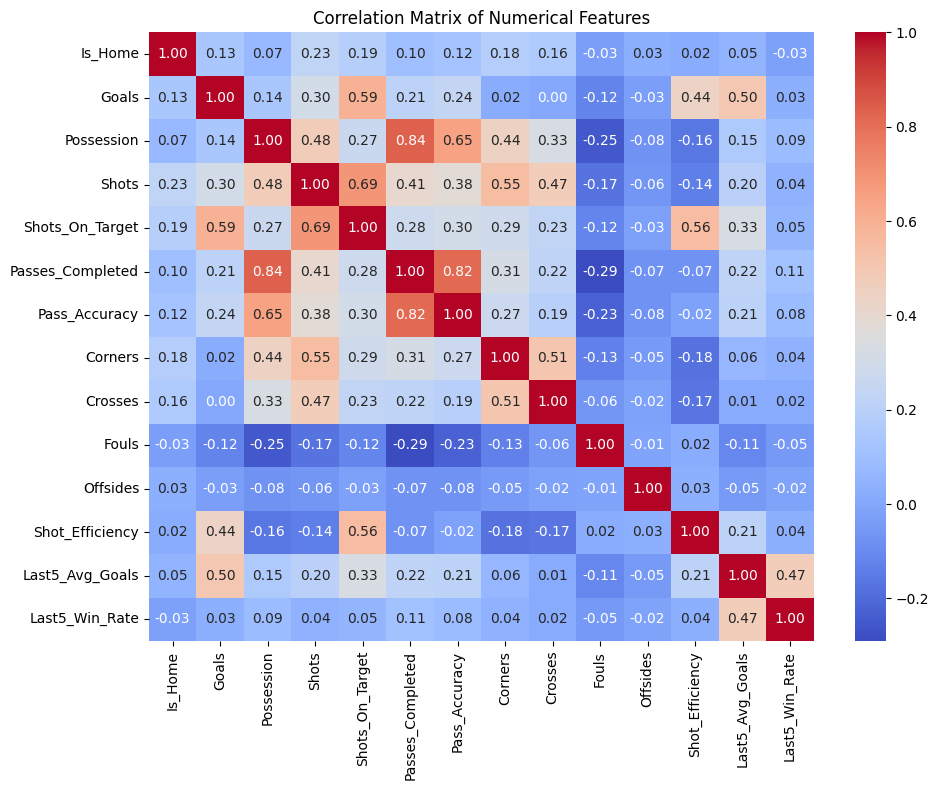

In [10]:
#numerical data analysis
numircal_data = df_reduce.select_dtypes(include=[np.number]) #➡️ Select only numerical columns from the dataframe
corr_data= numircal_data.corr() #➡️ Calculate the correlation matrix for numerical data

plt.figure(figsize=(10,8)) #➡️ Set the figure size for the heatmap
sns.heatmap(corr_data, annot=True, fmt=".2f", cmap='coolwarm') #➡️ Create a heatmap to visualize correlations
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

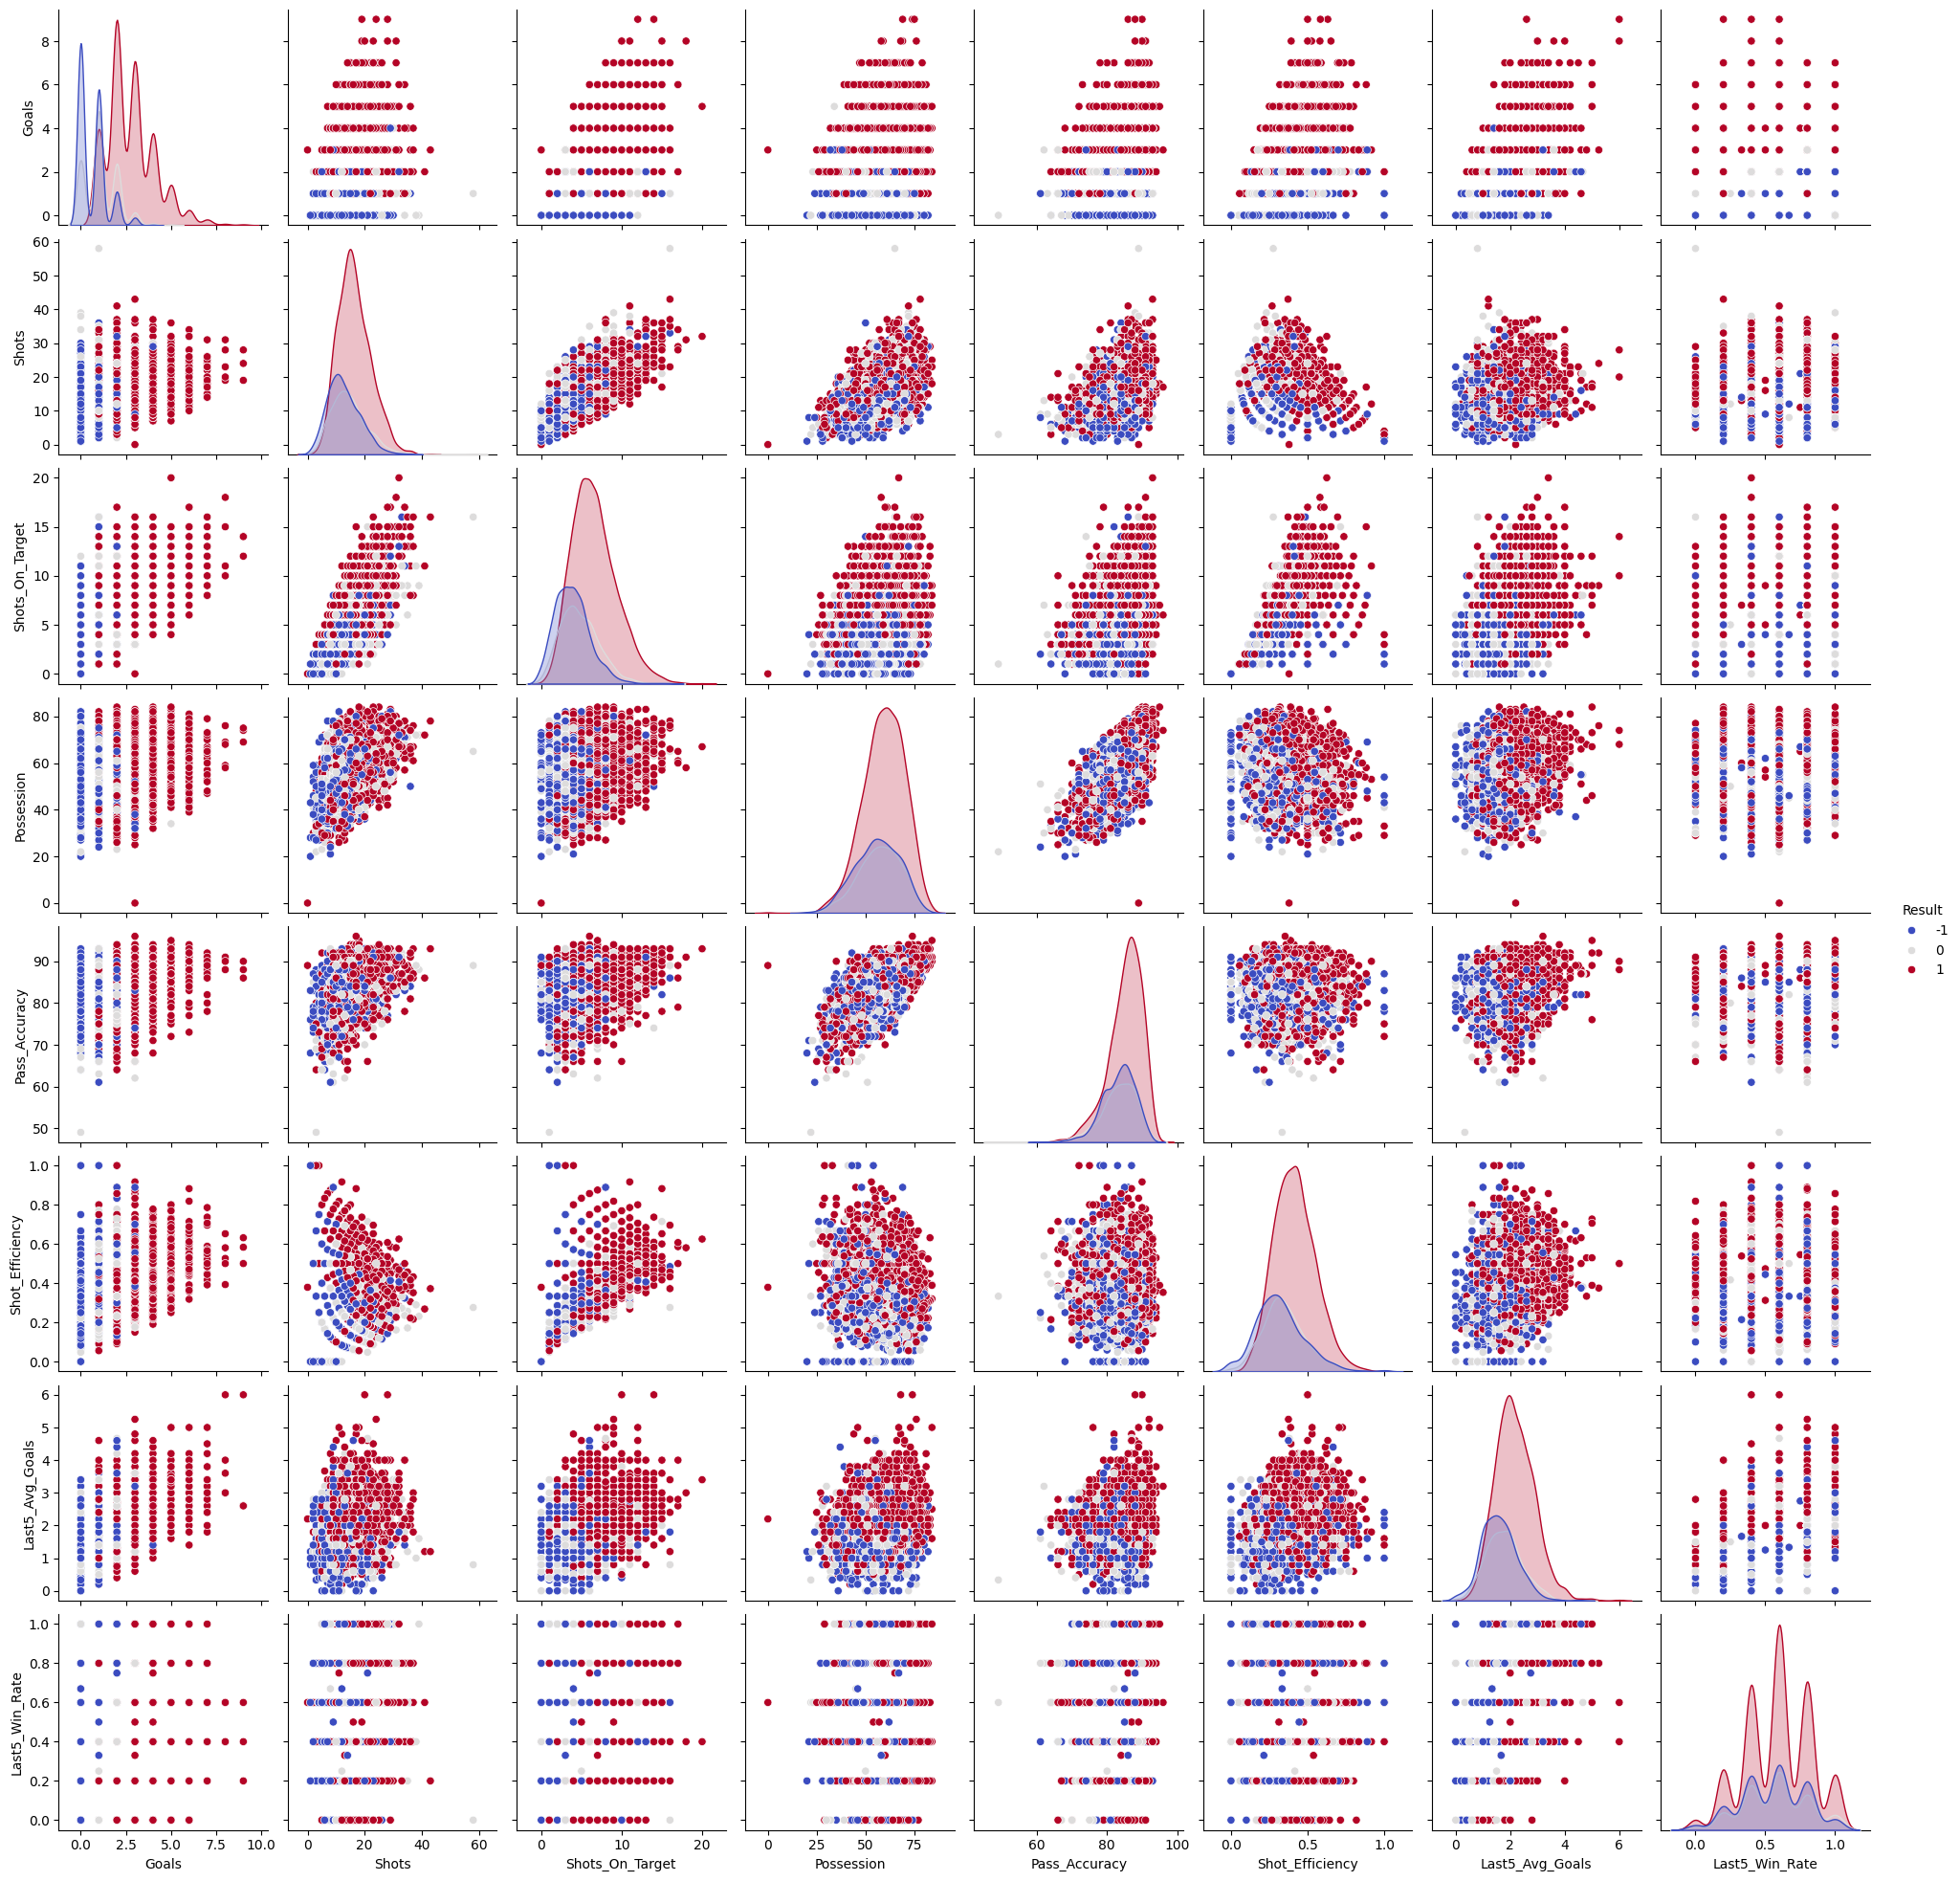

<Figure size 1200x1000 with 0 Axes>

In [11]:
cols = [ "Goals", "Shots", "Shots_On_Target",
        "Possession", "Pass_Accuracy",
        "Shot_Efficiency", "Last5_Avg_Goals", "Last5_Win_Rate", "Result"]
sns.pairplot(final_df[cols], hue="Result", diag_kind="kde", palette="coolwarm") #➡️ Create pair plots for selected numerical features
plt.figure(figsize=(12,10))
plt.suptitle('Pairplot of Key Numerical Features')
plt.tight_layout()
plt.show()

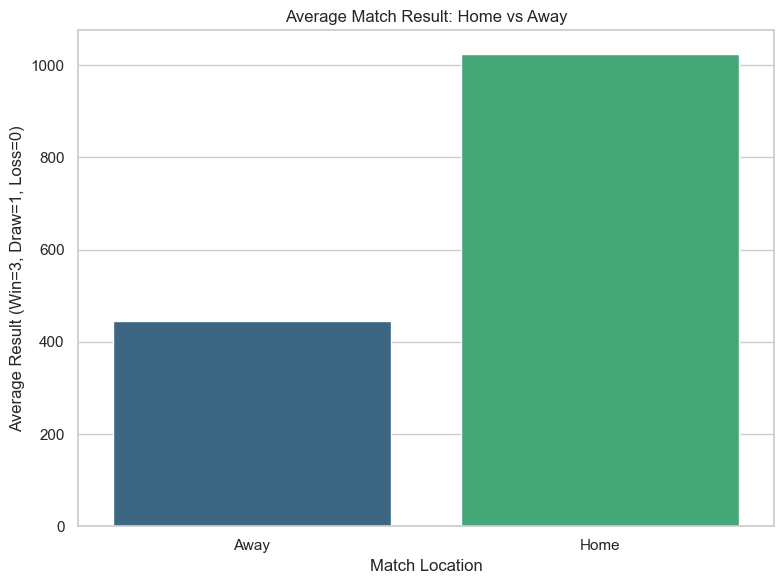

In [67]:
R_H = final_df.groupby('Is_Home')['Result'].sum().reset_index() #➡️ Calculate average result based on home/away
R_H["Is_Home"] = R_H["Is_Home"].replace({1: 'Home', 0: 'Away'}) #➡️ Replace numerical values with descriptive labels
plt.figure(figsize=(8,6)) #➡️ Set the figure size for the bar plot
sns.barplot(data=R_H, x='Is_Home', y='Result', hue='Is_Home', palette='viridis') #➡️ Create a bar plot to visualize average result by match location
plt.title('Average Match Result: Home vs Away') #➡️ Add title to the plot
plt.ylabel('Average Result (Win=3, Draw=1, Loss=0)') #➡️ Label the y-axis
plt.xlabel('Match Location') #➡️ Label the x-axis
plt.tight_layout()
plt.show()

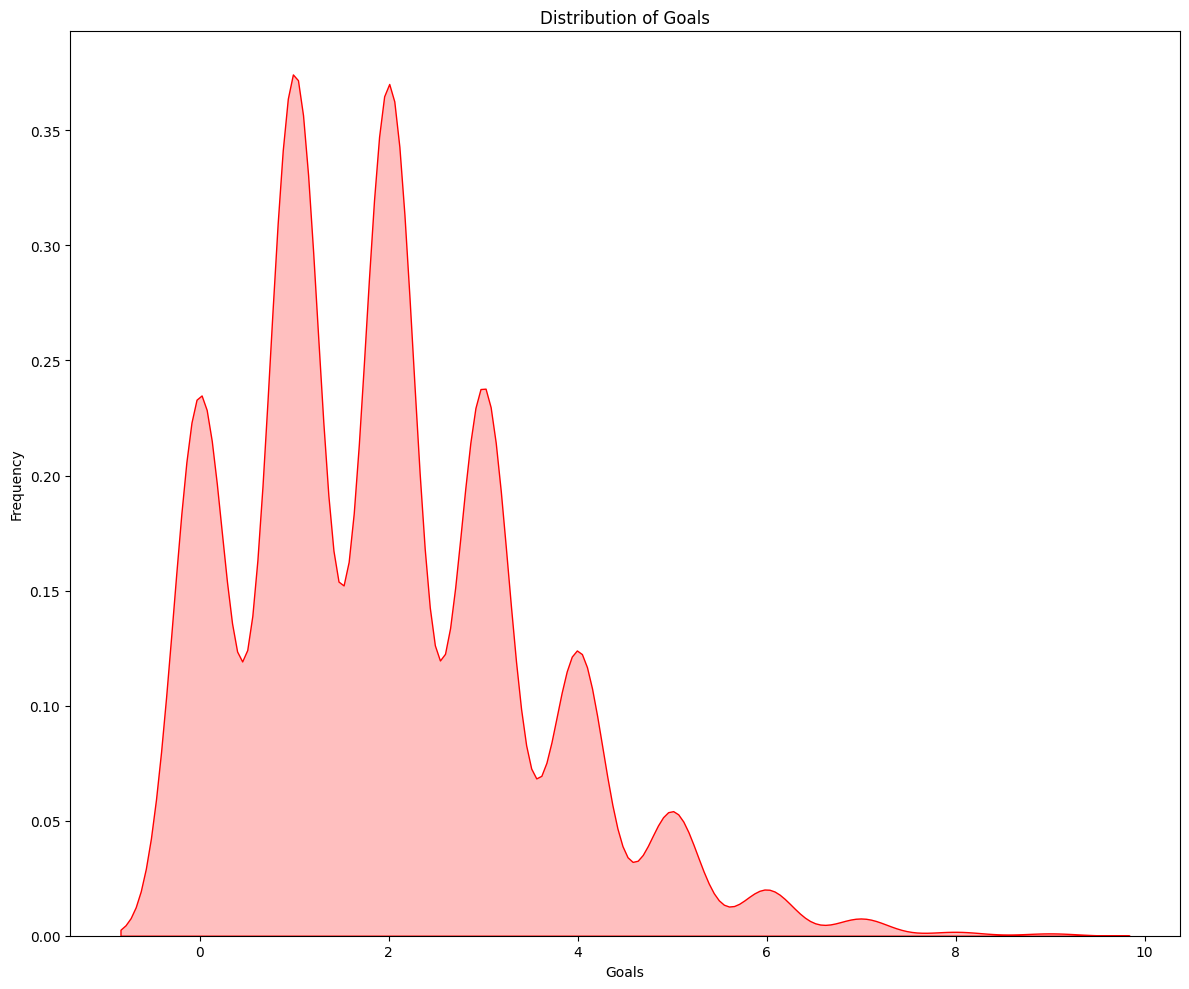

In [13]:
# Distribution of Goals
plt.figure(figsize=(12,10))
sns.kdeplot(final_df['Goals'],fill=True, color='red')
plt.title('Distribution of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

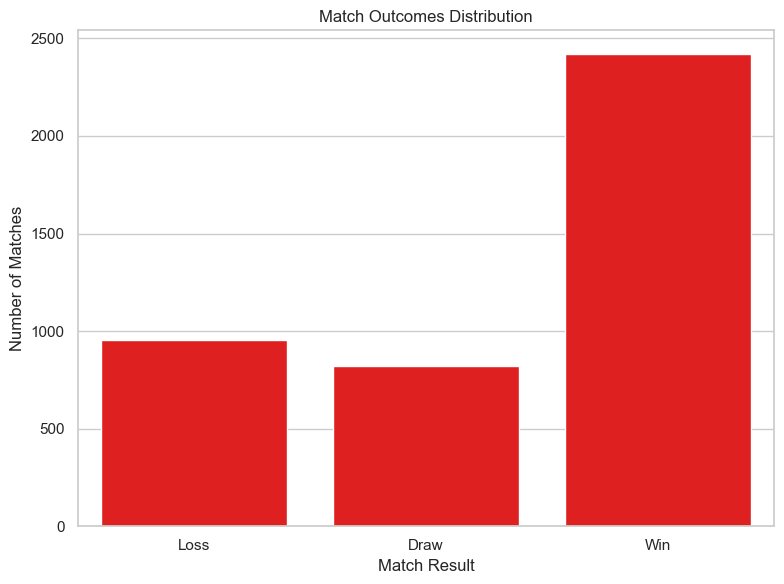

,Result,Count
0,Loss,952
1,Draw,822
2,Win,2420


In [60]:
df = final_df.groupby('Result')['Team'].count().reset_index() #➡️ Count the number of matches for each result type

df_temp_rename=df.rename(columns={"Team":"Count"}) #➡️ Rename the 'Team' column to 'Count' for clarity

df_temp_rename["Result"] = df_temp_rename["Result"].replace({-1: "Loss", 0: "Draw", 1: "Win"})


plt.figure(figsize=(8,6)) #➡️ Set the figure size for the bar plot
sns.barplot(x='Result',y='Count',data=df_temp_rename) #➡️ Create a bar plot to visualize match outcomes
plt.title('Match Outcomes Distribution')
plt.xlabel('Match Result')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()
df_temp_rename

In [27]:
# ===============================
# Fouls Analysis by Season & Team
# ===============================

# 1️⃣ Filter and group by season and team
df_grouped = (
    final_df[final_df["Season"] >= 2013]
    .groupby(["Season", "Team"])[["Fouls", "Opponent_Fouls"]]
    .sum()
    .reset_index()
)

# 2️⃣ Loop over each season
for season in range(2013, 2026):
    season_df = df_grouped[df_grouped["Season"] == season]

    # 3️⃣ Find the team with the most fouls
    index_max_fouls = season_df["Fouls"].idxmax()
    team_max_fouls = season_df.loc[index_max_fouls, "Team"]
    max_fouls = season_df.loc[index_max_fouls, "Fouls"]

    # 4️⃣ Find the team with the most opponent fouls
    index_max_opp_fouls = season_df["Opponent_Fouls"].idxmax()
    team_max_opp_fouls = season_df.loc[index_max_opp_fouls, "Team"]
    max_opp_fouls = season_df.loc[index_max_opp_fouls, "Opponent_Fouls"]

    # 5️⃣ Clear and readable print output
    print(f"Season {season} Results:")
    print(f"  🟦 Most Fouls: {team_max_fouls} ({max_fouls} fouls)")
    print(f"  🟥 Most Opponent Fouls: {team_max_opp_fouls} ({max_opp_fouls} fouls)")
    print("="*80)

# 6️⃣ Display the final grouped DataFrame
df_grouped


Season 2013 Results:
  🟦 Most Fouls: Tottenham (468 fouls)
  🟥 Most Opponent Fouls: Tottenham (478 fouls)
Season 2014 Results:
  🟦 Most Fouls: Chelsea (707 fouls)
  🟥 Most Opponent Fouls: Chelsea (792 fouls)
Season 2015 Results:
  🟦 Most Fouls: Liverpool (691 fouls)
  🟥 Most Opponent Fouls: Chelsea (779 fouls)
Season 2016 Results:
  🟦 Most Fouls: Manchester United (784 fouls)
  🟥 Most Opponent Fouls: Liverpool (791 fouls)
Season 2017 Results:
  🟦 Most Fouls: Manchester United (934 fouls)
  🟥 Most Opponent Fouls: Manchester United (875 fouls)
Season 2018 Results:
  🟦 Most Fouls: Manchester United (681 fouls)
  🟥 Most Opponent Fouls: Chelsea (739 fouls)
Season 2019 Results:
  🟦 Most Fouls: Chelsea (716 fouls)
  🟥 Most Opponent Fouls: Chelsea (823 fouls)
Season 2020 Results:
  🟦 Most Fouls: Tottenham (662 fouls)
  🟥 Most Opponent Fouls: Tottenham (701 fouls)
Season 2021 Results:
  🟦 Most Fouls: Chelsea (750 fouls)
  🟥 Most Opponent Fouls: Tottenham (840 fouls)
Season 2022 Results:
  🟦 Mos

,Season,Team,Fouls,Opponent_Fouls
0,2013,Arsenal,348,364
1,2013,Chelsea,201,186
2,2013,Liverpool,116,117
3,2013,Manchester City,173,133
4,2013,Manchester United,143,160
...,...,...,...,...
73,2025,Chelsea,153,162
74,2025,Liverpool,217,190
75,2025,Manchester City,142,167
76,2025,Manchester United,204,210


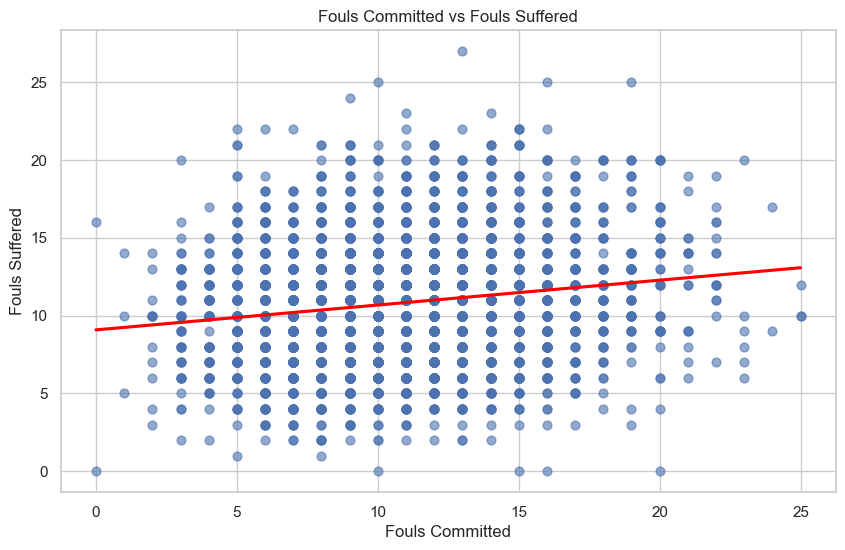

In [30]:

sns.set(style="whitegrid")  # nice background

# 1️⃣ Fouls vs Opponent Fouls
plt.figure(figsize=(10,6))
sns.regplot(
    data=final_df, 
    x="Fouls", 
    y="Opponent_Fouls", 
    ci=None,  # no confidence interval
    scatter_kws={'s':40, 'alpha':0.6}, 
    line_kws={'color':'red'}
)
plt.title("Fouls Committed vs Fouls Suffered")
plt.xlabel("Fouls Committed")
plt.ylabel("Fouls Suffered")
plt.show()

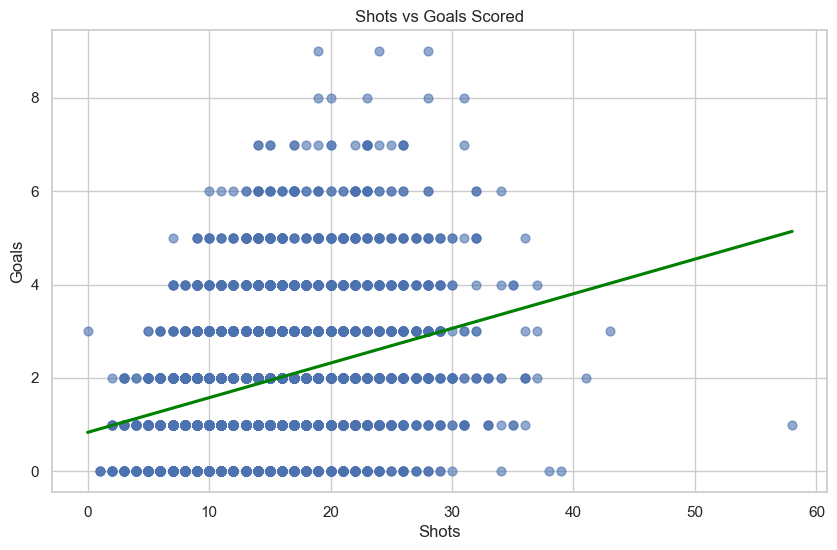

In [41]:
# 2️⃣ Shots vs Goals
plt.figure(figsize=(10,6))
sns.regplot(
    data=final_df, 
    x="Shots", 
    y="Goals",
    ci=None,
    scatter_kws={'s':40, 'alpha':0.6}, 
    line_kws={'color':'green'}
)
plt.title("Shots vs Goals Scored")
plt.xlabel("Shots")
plt.ylabel("Goals")
plt.show()

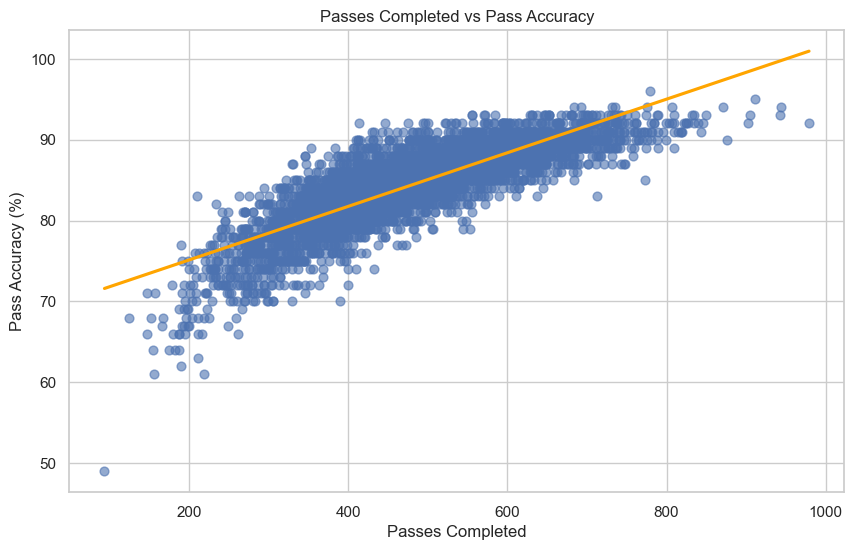

In [42]:
# 3️⃣ Passes Completed vs Pass Accuracy
plt.figure(figsize=(10,6))
sns.regplot(
    data=final_df, 
    x="Passes_Completed", 
    y="Pass_Accuracy",
    ci=None,
    scatter_kws={'s':40, 'alpha':0.6}, 
    line_kws={'color':'orange'}
)
plt.title("Passes Completed vs Pass Accuracy")
plt.xlabel("Passes Completed")
plt.ylabel("Pass Accuracy (%)")
plt.show()

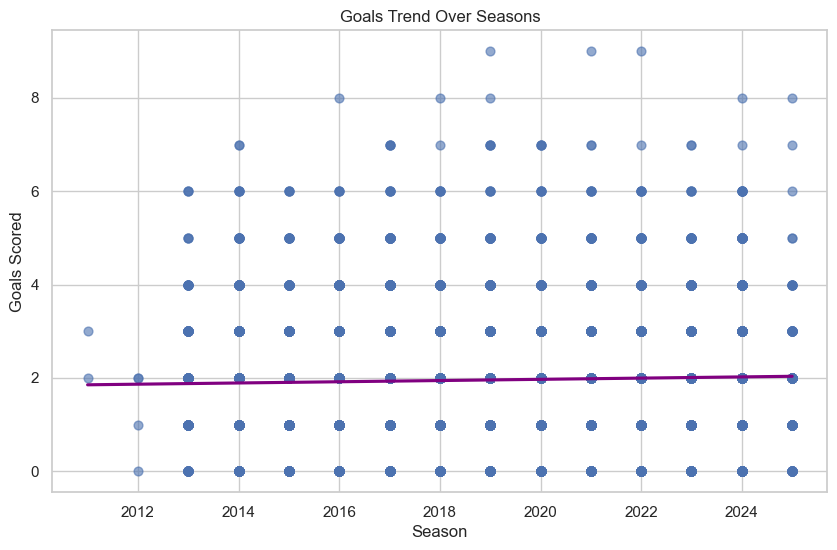

In [46]:
# 4️⃣ Season vs Goals (trend over seasons)
plt.figure(figsize=(10,6))
sns.regplot(
    data=final_df, 
    x="Season", 
    y="Goals",
    ci=None,
    scatter_kws={'s':40, 'alpha':0.6}, 
    line_kws={'color':'purple'}
)
plt.title("Goals Trend Over Seasons")
plt.xlabel("Season")
plt.ylabel("Goals Scored")
plt.show()

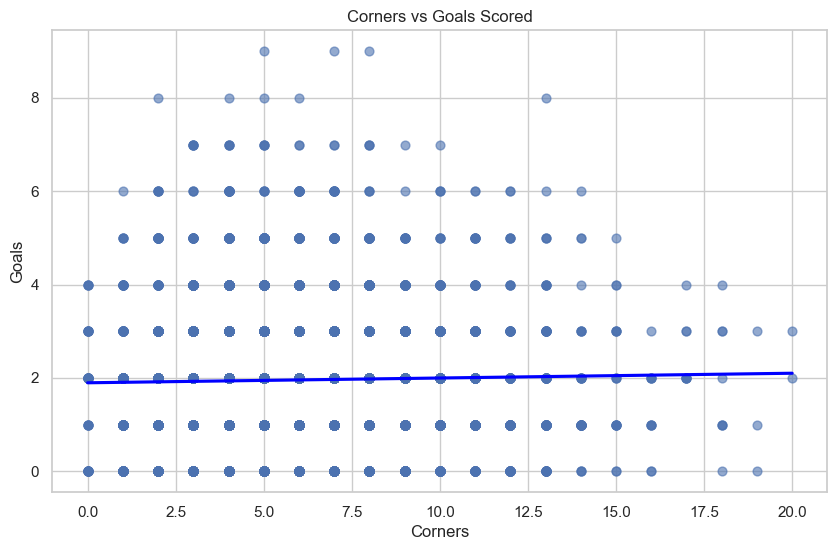

In [48]:
# 5️⃣ Corners vs Goals
plt.figure(figsize=(10,6))
sns.regplot(
    data=final_df, 
    x="Corners", 
    y="Goals",
    ci=None,
    scatter_kws={'s':40, 'alpha':0.6}, 
    line_kws={'color':'blue'}
)
plt.title("Corners vs Goals Scored")
plt.xlabel("Corners")
plt.ylabel("Goals")
plt.show()


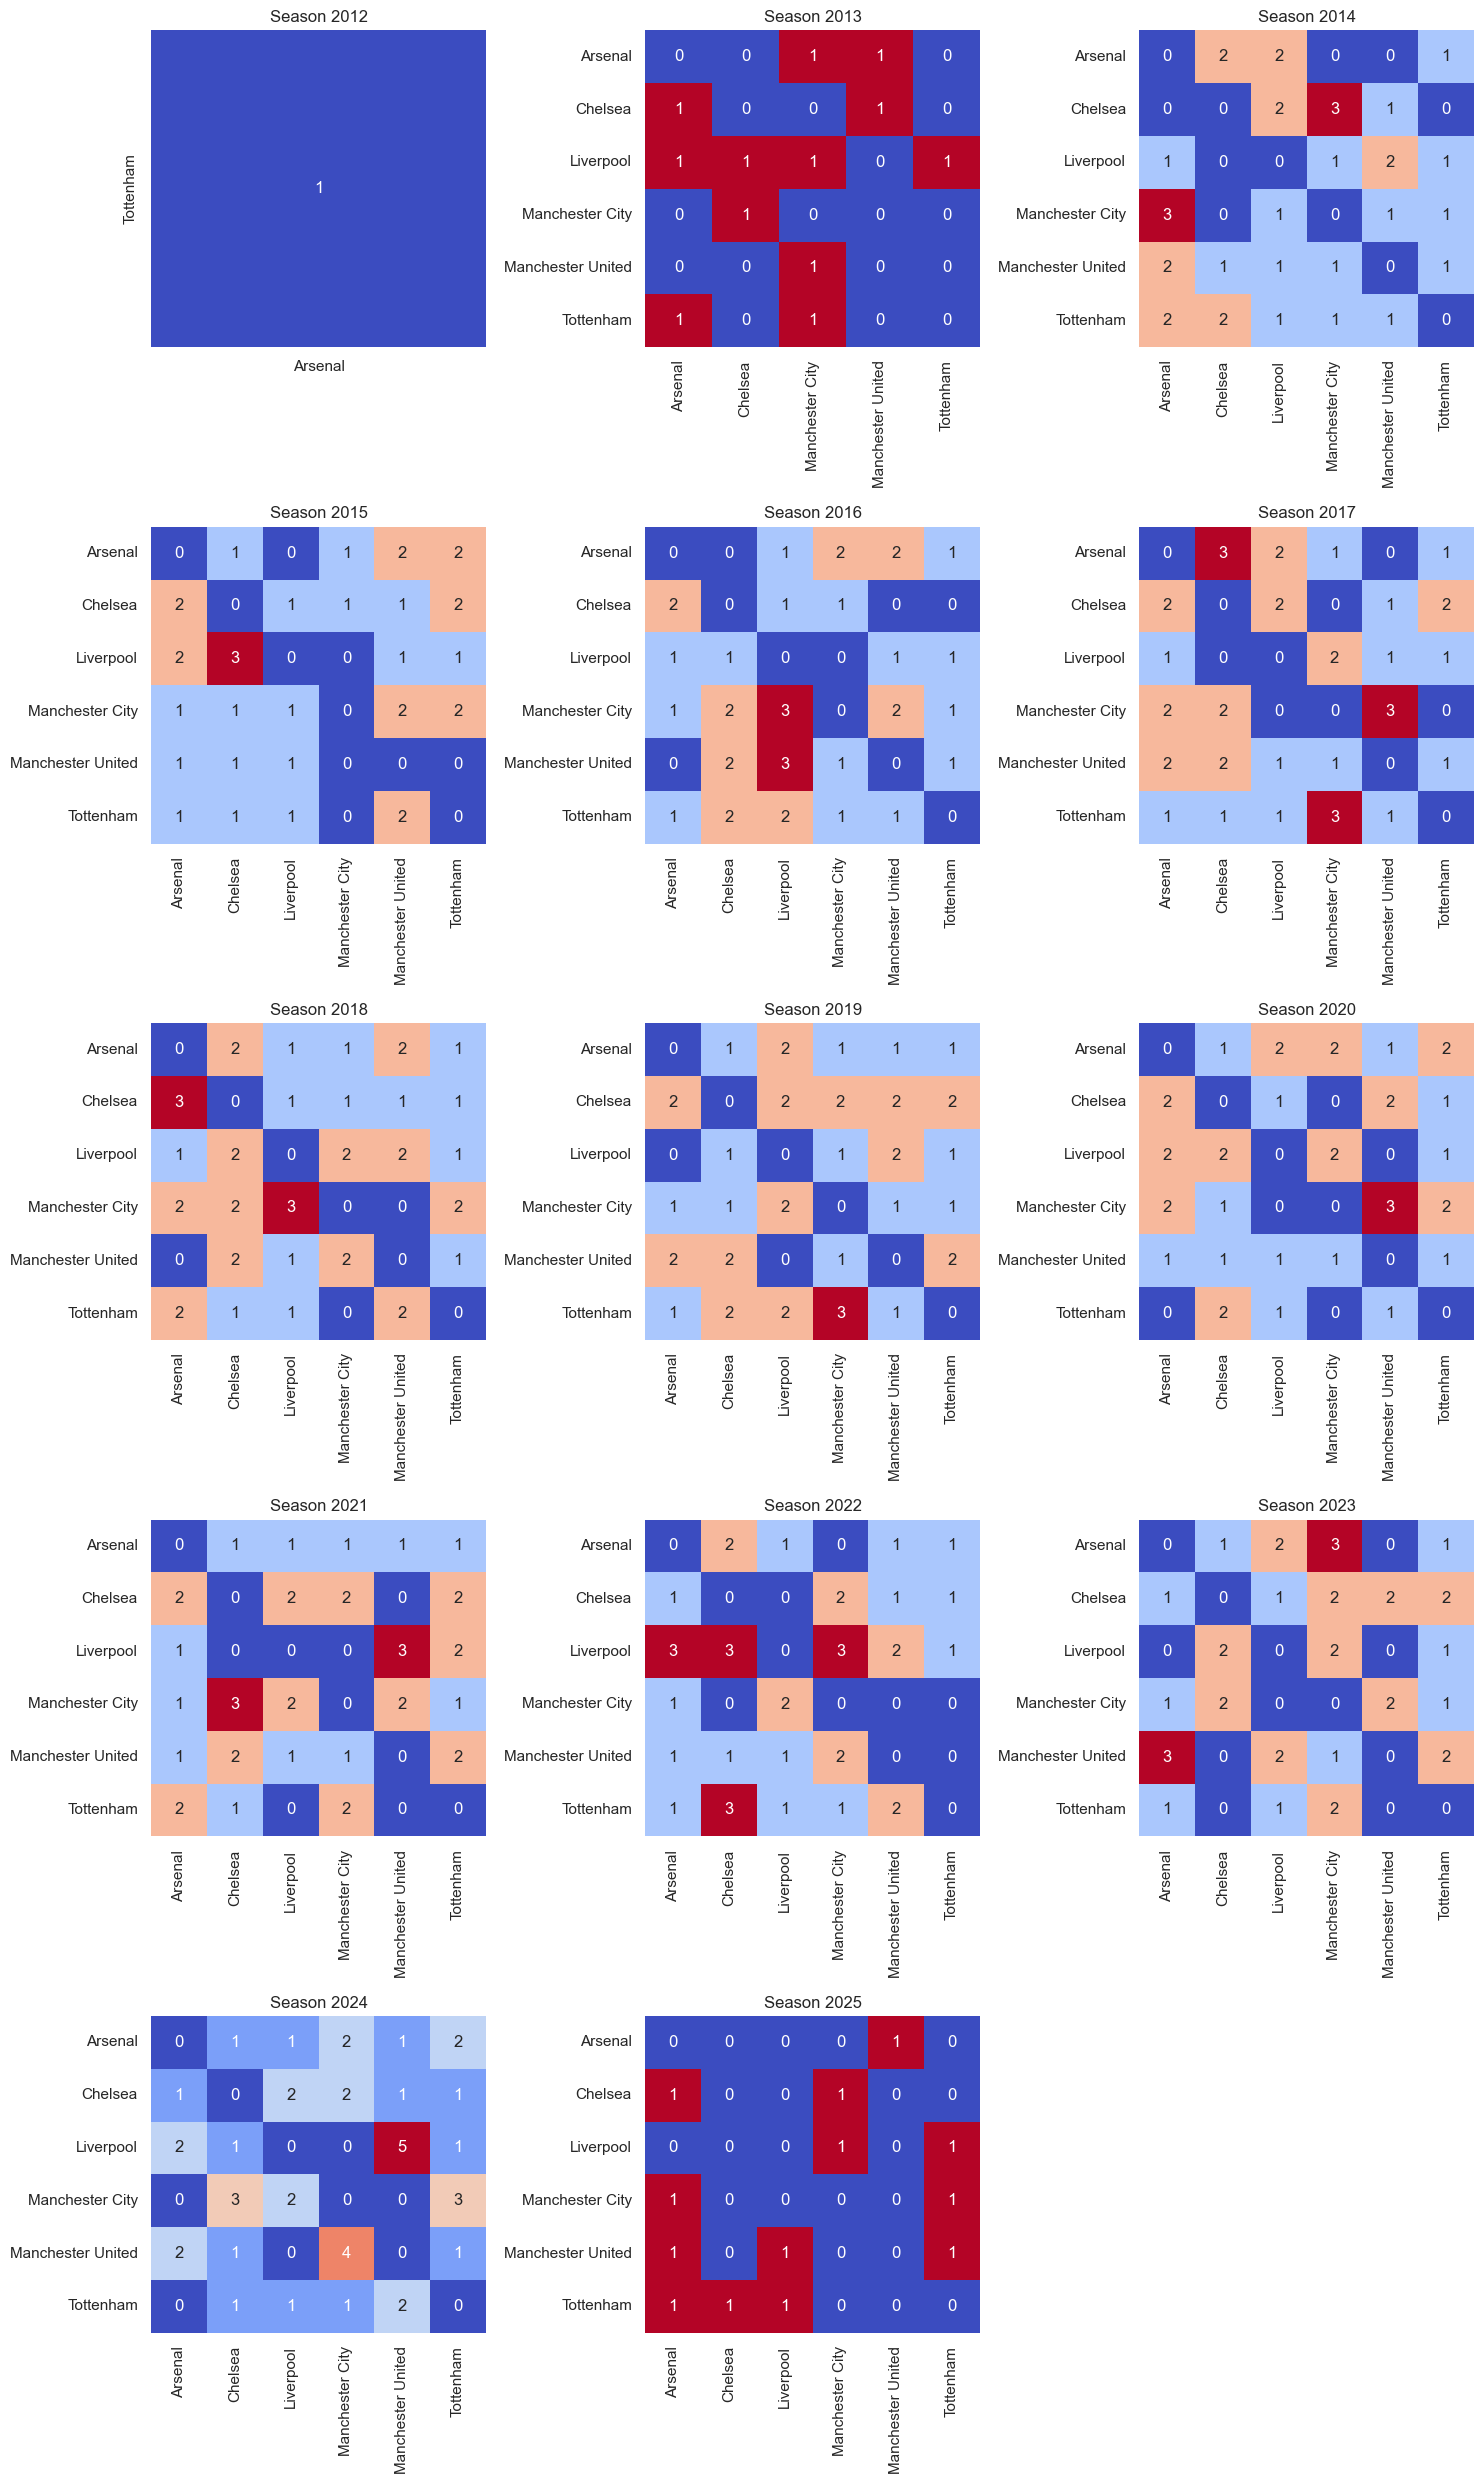

In [56]:

# Top 6 teams
teams = ["Manchester City","Manchester United","Arsenal","Liverpool","Chelsea","Tottenham"]

# Filter matches where both teams are in Top 6
df_filtered = final_df[final_df["Team"].isin(teams) & final_df["Opponent"].isin(teams)
]

# Seasons and subplot grid
seasons = sorted(df_filtered["Season"].unique())
n_cols = 3  
n_rows = -(-len(seasons) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))
axes = axes.flatten()

# Loop and plot heatmaps
for i, season in enumerate(seasons):
    matrix = (
        df_filtered[df_filtered["Season"] == season]
        .groupby(["Team", "Opponent"])
        .size()
        .unstack(fill_value=0)
    )
    sns.heatmap(matrix, annot=True, fmt=".0f", cmap="coolwarm", ax=axes[i], cbar=False)
    axes[i].set_title(f"Season {season}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove unused subplots
for ax in axes[len(seasons):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [59]:
new_df=df_filtered[["Team","Opponent","Goals","Opponent_Goals",
                    "Result","Possession","Opponent_Possession",]].value_counts().reset_index()
new_df

,Team,Opponent,Goals,Opponent_Goals,Result,Possession,Opponent_Possession,count
0,Chelsea,Manchester United,1,1,0,48,52,2
1,Manchester City,Manchester United,0,2,-1,50,50,2
2,Chelsea,Liverpool,1,1,0,45,55,2
3,Liverpool,Manchester United,3,0,1,53,47,2
4,Liverpool,Manchester City,1,1,0,40,60,2
...,...,...,...,...,...,...,...,...
441,Arsenal,Manchester United,2,3,-1,61,39,1
442,Arsenal,Tottenham,0,1,-1,48,52,1
443,Arsenal,Tottenham,0,1,-1,50,50,1
444,Arsenal,Tottenham,0,2,-1,49,51,1


In [63]:
# Developped statistics
df_new=df_filtered[["Team","Opponent","Goals","Opponent_Goals","Result","Possession","Opponent_Possession"]].value_counts().reset_index()
df_new=df_new.rename(columns={"Result":"Result Team"})
df_new

,Team,Opponent,Goals,Opponent_Goals,Result Team,Possession,Opponent_Possession,count
0,Chelsea,Manchester United,1,1,0,48,52,2
1,Manchester City,Manchester United,0,2,-1,50,50,2
2,Chelsea,Liverpool,1,1,0,45,55,2
3,Liverpool,Manchester United,3,0,1,53,47,2
4,Liverpool,Manchester City,1,1,0,40,60,2
...,...,...,...,...,...,...,...,...
441,Arsenal,Manchester United,2,3,-1,61,39,1
442,Arsenal,Tottenham,0,1,-1,48,52,1
443,Arsenal,Tottenham,0,1,-1,50,50,1
444,Arsenal,Tottenham,0,2,-1,49,51,1


In [64]:
#➡️Number of matches between the teams
#➡️counting matches between each pair of teams, regardless of home/away status
copy_data=df_new.copy()
copy_data["Teams_sorted"]=copy_data.apply(
    lambda row: tuple(sorted([row["Team"],row["Opponent"]])) ,axis=1
)
#➡️ Summing counts for each unique pair of teams
vs_match=copy_data.groupby("Teams_sorted")["count"].sum().reset_index()
vs_match[["Team 1","Team 2"]]=pd.DataFrame(vs_match["Teams_sorted"].tolist(),index=vs_match.index)
vs_match=vs_match.drop(columns=["Teams_sorted"])
vs_match=vs_match.rename(columns={"count":"Number of matches"})
vs_match.sort_values("Number of matches").reset_index()


,index,Number of matches,Team 1,Team 2
0,14,26,Manchester United,Tottenham
1,11,27,Liverpool,Tottenham
2,7,28,Chelsea,Manchester United
3,3,29,Arsenal,Manchester United
4,4,29,Arsenal,Tottenham
5,13,30,Manchester City,Tottenham
6,1,30,Arsenal,Liverpool
7,5,31,Chelsea,Liverpool
8,9,31,Liverpool,Manchester City
9,8,31,Chelsea,Tottenham


In [66]:
df_copy=df_filtered.copy()
df_copy["Teams_sorted"]=df_copy.apply(
    lambda row : tuple(sorted([row["Team"],row["Opponent"]])),axis=1
)
def points_team(row):
    team1,team2=sorted([row["Team"],row["Opponent"]])
    if row["Team"]==team1:
        points_team1=3 if row["Result"]==1 else 1 if row["Result"]==0 else 0
        points_team2=3 if row["Result"]==-1 else 1 if row["Result"]==0 else 0
    else:
        points_team2=3 if row["Result"]==1 else 1 if row["Result"]==0 else 0
        points_team1=3 if row["Result"]==-1 else 1 if row["Result"]==0 else 0
    return pd.Series([points_team1,points_team2])
df_copy[["Points_team1","Points_team2"]]=df_copy.apply(points_team,axis=1)
def win_team(row):
    team1,team2=sorted([row["Team"],row["Opponent"]])
    win1=1 if ((row["Result"]==1 and row["Team"]==team1) or (row["Result"]==-1 and row["Team"]==team2)) else 0
    win2=1 if ((row["Result"]==1 and row["Team"]==team2) or (row["Result"]==-1 and row["Team"]==team1)) else 0
    draw=1 if row["Result"]==0 else 0
    return pd.Series([win1,win2,draw])
df_copy[["win_1","win_2","draws"]]=df_copy.apply(win_team,axis=1)
Summary=df_copy.groupby("Teams_sorted").agg(
    number_of_matches=("Result",'count'),
    Goals_team1=("Goals",'sum'),
    Goals_team2=("Opponent_Goals",'sum'),
    Points_team1=("Points_team1",'sum'),
    Points_team2=("Points_team2",'sum'),
    win_team1=("win_1",'sum'),
    win_team2=("win_2",'sum'),
    Draws=("draws",'sum')
).reset_index()
Summary[["Team1","Team2"]]=pd.DataFrame(Summary["Teams_sorted"].tolist(),index=Summary.index)
Summary=Summary.drop(columns=["Teams_sorted"])
Summary


,number_of_matches,Goals_team1,Goals_team2,Points_team1,Points_team2,win_team1,win_team2,Draws,Team1,Team2
0,35,31,64,52,43,14,11,10,Arsenal,Chelsea
1,30,44,65,27,51,5,13,12,Arsenal,Liverpool
2,31,39,61,31,55,8,16,7,Arsenal,Manchester City
3,29,32,45,44,35,12,9,8,Arsenal,Manchester United
4,29,31,50,49,31,14,8,7,Arsenal,Tottenham
5,31,33,36,41,38,9,8,14,Chelsea,Liverpool
6,35,41,54,35,65,10,20,5,Chelsea,Manchester City
7,28,25,40,36,36,8,8,12,Chelsea,Manchester United
8,31,36,54,63,24,19,6,6,Chelsea,Tottenham
9,31,37,63,51,33,14,8,9,Liverpool,Manchester City
